Лабораторная работа
Вяткина Арина
Минеева Анна
РИ-471223

# Метод главных компонент

### Алгоритм PCA

Дана матрица данных $D$ и коэффициент $\alpha$:
1. вычисляем среднее значение $\mu = \frac{1}{n} \sum \limits_{i=1}^{n} x_i$;
2. центруем матрицу данных $Z = D - 1 \cdot \mu^T$;
3. вычисляем матрицу ковариаций $K = \frac{1}{n} (Z^T Z)$;
4. вычисляем собственные значения $(\lambda_1, \lambda_2, \ldots, \lambda_d)$;
5. вычисляем собственные векторы $U = (u_1 u_2 \ldots u_d)$;
6. вычисляем долю общей дисперсии $f(r) = \frac{\sum_{i=1}^{r} \lambda_i} {\sum_{i=1}^{n} \lambda_i}$;
7. выбираем наименьший $r$ так, чтобы $f(r) \geq \alpha$;
8. выбираем $r$ первых векторов $U = (u_1 u_2 \ldots u_r)$;
9. уменьшаем признаковое пространство: $A = \{ a_i \: | \: a_i = U_r^T x_i, \: для \: i = 1, \ldots, n \} $

Реализуйте алгоритм для первых двух главных компонент. Найдите $\lambda_1$, $\lambda_2$ и $u_1$, $u_2$. Спроецируйте данные на плоскость образуемую этими векторами, визуализируйте полученные результаты c метками классов. Сравните реузльтаты с методом PCA из библиотеки sklearn.decomposition.

В качестве данных возьмите изображения с рукописными цифрами.

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig
from sklearn.datasets import load_iris
import seaborn as sns

%matplotlib inline

data = load_iris()
x, y = data['data'], data['target']

In [65]:
# вычисляем среднее значение в каждом столбце
u = np.mean(x, axis=0)
# центруем матрицу данных 
Z = x - u.T
# вычисляем матрицу ковариаций 
K = np.cov(Z.transpose())
# вычисляем собственные значения и собственные векторы с помощью функции linalg.eig()
values, vectors = eig(K)

#дисперсия
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))
print(np.sum(explained_variances), '\n', explained_variances)

1.0 
 [0.9246187232017269, 0.053066483117067985, 0.017102609807929738, 0.005212183873275414]


In [66]:
import pandas as pd
projected_1 = Z.dot(vectors.T[0])
projected_2 = Z.dot(vectors.T[1])
res = pd.DataFrame(projected_1, columns=['PC1'])
res['PC2'] = projected_2
res['Y'] = y
res.head()

,PC1,PC2,Y
0,-2.684126,-0.319397,0
1,-2.714142,0.177001,0
2,-2.888991,0.144949,0
3,-2.745343,0.318299,0
4,-2.728717,-0.326755,0


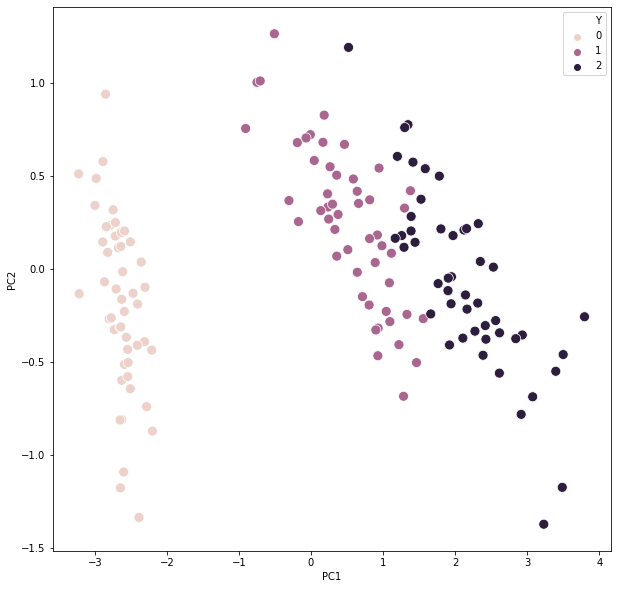

In [67]:
plt.figure(figsize=(10, 10))
sns.scatterplot(res['PC1'], res['PC2'], hue=res['Y'], s = 100)

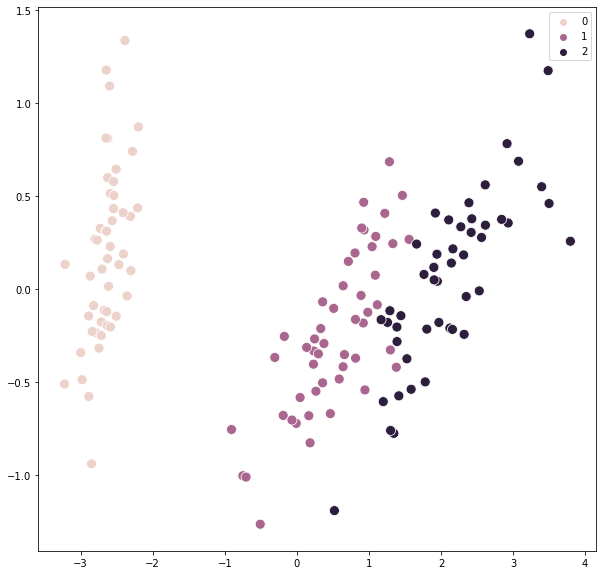

In [68]:
#  метод PCA из библиотеки sklearn.decomposition
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(Z)
x_pca = pca.transform(Z)
plt.figure(figsize=(10, 10))
sns.scatterplot(x_pca[:,0], x_pca[:,1], hue = y, s = 100)
plt.show()

На основе полученных собственных значений ковариационной матриы $K$ постройте график зависимости покрываемой дисперсии трансформированных данных от количества главных компонент.

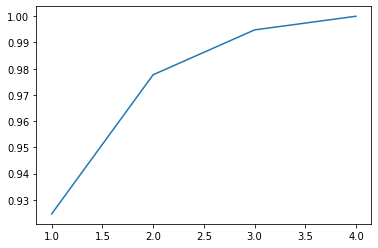

In [69]:
coverage = [] 
coverage_sum = 0
K1 = [[values[i], vectors[i]] for i in range(x.shape[1])] # ковариацонная матрица 

for value, arrow in K1:
    coverage_sum = coverage_sum + value;
    coverage.append(coverage_sum);

plt.plot([i for i in range(1, len(K1) + 1)], [i / coverage_sum for i in coverage])
plt.show()

# Интерпретация компонент
## Корреляция с исходными признаками
Главные компоненты являются линейными кобинациями исходных признаков. В этой связи необходимо оценить связь каждой компоненты с исходными признаками.

Рассчет взаимосвязи будем проводить с помощью корреляции Пирсона:

\begin{equation}
r_{jk} = \frac{\sum_{i=1}^n (x_{ij} - \bar{x}_j) (x_{ik}' - \bar{x}_k')}{\sqrt{\sum_{i=1}^n (x_{ij} - \bar{x}_j)^2 \sum_{i=1}^n (x_{ik}' - \bar{x}_k')^2}}
\end{equation}

где
$\bar{x}_j$ - среднее значение $j$-го признака,
$\bar{x}_k'$ - среднее значение проекции на $k$-ю главную компоненту,
$n$ - количество объектов.

Отметим, что корреляция Пирсона изменяется от $-1$ до $+1$. Она равна $0$ в случае, когда величины независимы, и $\pm 1$, если они линейно зависимы.

Определите по коэффициентам корреляции, какие признаки в какую компоненту вошли.

In [70]:
# вычисляем корреляцию Пирсона 
print(np.corrcoef(vectors, x))

[[ 1.         -0.08149028  0.09652179 ...  0.09668298  0.0068507
  -0.00612012]
 [-0.08149028  1.          0.09183851 ...  0.5767498   0.60456711
   0.60557903]
 [ 0.09652179  0.09183851  1.         ...  0.86430462  0.84824541
   0.84702904]
 ...
 [ 0.09668298  0.5767498   0.86430462 ...  1.          0.99570813
   0.99446012]
 [ 0.0068507   0.60456711  0.84824541 ...  0.99570813  1.
   0.99991588]
 [-0.00612012  0.60557903  0.84702904 ...  0.99446012  0.99991588
   1.        ]]
